In [1]:
from no_privacy import no_privacy_avg
from experiment import gen_arr, time_run
from pailler import paillier_avg
from shamir import shamir_avg
import matplotlib.pyplot as plt

Testing function: no_privacy_avg
  Size 1/5: n=5
    Trial 1/3... took 0.000002s
    Trial 2/3... took 0.000001s
    Trial 3/3... took 0.000000s
    Average for n=5: 0.000001s

  Size 2/5: n=50
    Trial 1/3... took 0.000000s
    Trial 2/3... took 0.000000s
    Trial 3/3... took 0.000000s
    Average for n=50: 0.000000s

  Size 3/5: n=500
    Trial 1/3... took 0.000002s
    Trial 2/3... took 0.000002s
    Trial 3/3... took 0.000001s
    Average for n=500: 0.000002s

  Size 4/5: n=1000
    Trial 1/3... took 0.000003s
    Trial 2/3... took 0.000003s
    Trial 3/3... took 0.000003s
    Average for n=1000: 0.000003s

  Size 5/5: n=2000
    Trial 1/3... took 0.000006s
    Trial 2/3... took 0.000006s
    Trial 3/3... took 0.000006s
    Average for n=2000: 0.000006s

Completed no_privacy_avg
--------------------------------------------------
Testing function: paillier_avg
  Size 1/5: n=5
    Trial 1/3... took 1.954884s
    Trial 2/3... took 2.187290s
    Trial 3/3... took 2.203442s
    Averag

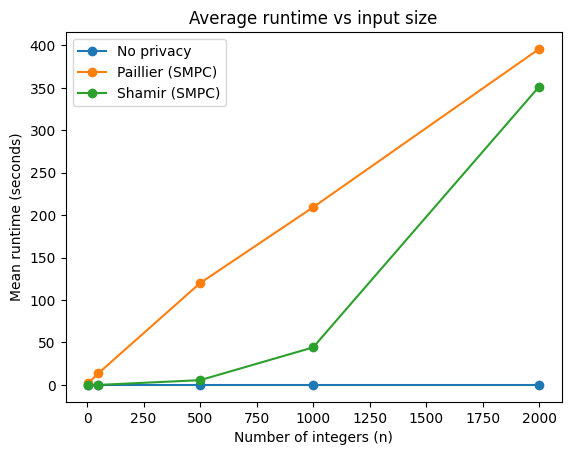

In [3]:
sizes  = [5,50,500,1000,2000]
trials = 3

# --- measure ---
def mean_time_per_size(fn):
    print(f"Testing function: {fn.__name__}")
    means = []
    for i, n in enumerate(sizes):
        print(f"  Size {i+1}/{len(sizes)}: n={n}")
        
        ts = []
        for t in range(trials):
            print(f"    Trial {t+1}/{trials}...", end=" ")
            arr = gen_arr(n, seed=42 + 1000*n + t)
            runtime = time_run(fn, arr)
            ts.append(runtime)
            print(f"took {runtime:.6f}s")
        
        mean_time = sum(ts) / len(ts)
        means.append(mean_time)
        print(f"    Average for n={n}: {mean_time:.6f}s")
        print()
    
    print(f"Completed {fn.__name__}")
    print("-" * 50)
    return means

t_no      = mean_time_per_size(no_privacy_avg)
t_paillier= mean_time_per_size(paillier_avg)
t_shamir  = mean_time_per_size(shamir_avg)

plt.figure()
plt.plot(sizes, t_no,       marker="o", label="No privacy")
plt.plot(sizes, t_paillier, marker="o", label="Paillier (SMPC)")
plt.plot(sizes, t_shamir,   marker="o", label="Shamir (SMPC)")
plt.xlabel("Number of integers (n)")
plt.ylabel("Mean runtime (seconds)")
plt.title("Average runtime vs input size")
plt.legend()
plt.show()

In [10]:
def test_accuracy():
    test_sizes = [3, 5, 10, 20, 50]
    
    for n in test_sizes:
        print(f"\nTesting with n={n}:")
        test_data = gen_arr(n, seed=12345 + n)
        
        result1 = no_privacy_avg(test_data)
        result2 = paillier_avg(test_data)
        result3 = shamir_avg(test_data)
        
        print(f"  No privacy: {result1}")
        print(f"  Paillier:   {result2}")
        print(f"  Shamir:     {result3}")
        
        # Check if all match
        if result1 == result2 == result3:
            print("  All algorithms match!")
        else:
            print("  Results don't match!")

test_accuracy()


Testing with n=3:
  No privacy: 3838.6666666666665
  Paillier:   3838.6666666666665
  Shamir:     3838.6666666666665
  All algorithms match!

Testing with n=5:
  No privacy: 6389.6
  Paillier:   6389.6
  Shamir:     6389.6
  All algorithms match!

Testing with n=10:
  No privacy: 5715.0
  Paillier:   5715.0
  Shamir:     5715.0
  All algorithms match!

Testing with n=20:
  No privacy: 5099.15
  Paillier:   5099.15
  Shamir:     5099.15
  All algorithms match!

Testing with n=50:
  No privacy: 5043.24
  Paillier:   5043.24
  Shamir:     5043.24
  All algorithms match!
